# ADC Project

## Libraries

In [1]:
#Dependecy Libs
#!pip install networkx
#!pip install pandas

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import os
import statistics

## Dataset Analysis

### Digraph Creation of Full Dataset

In [ ]:
def datasetGraph(path):
    G = nx.DiGraph()
    with open(path) as f:
        for line in f:
            connection = line.strip().split()
            if len(connection) == 2:
                node1, node2 = connection[:2]
                G.add_edge(node1, node2)
                

    return G

path = './files/gplus_combined.txt'
G = datasetGraph(path)
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())


## Ego Network

### Choosing

In [ ]:
info_file_path = './files/gplus/'
#egoNet_OG = 106724181552911298818

def chooseEgoGraph(G,nodeNumber):
    # rnd.seed(nodeNumber)
    # egoNet = rnd.choice(list(G.nodes))
    # while not os.path.exists(f'{info_file_path}{egoNet}.egofeat'):
    #     egoNet = rnd.choice(list(G.nodes))
    # nodeNumber = egoNet

    ego_graph = nx.ego_graph(G, nodeNumber)
    ego_graph.name = nodeNumber
    print('EgoNet ID:', nodeNumber)
    print('Number of nodes in EgoNet:', ego_graph.number_of_nodes())
    print(f'Number of edges in EgoNet:  {ego_graph.number_of_edges()}\n')
    return ego_graph, nodeNumber

def isBloggertNetwork(egoNet):
    with open(f'{info_file_path}{egoNet}.egofeat', 'r') as f:
        egoFeatures = [line.strip().split() for line in f][0]

    # Load feature names
    with open(f'{info_file_path}{egoNet}.featnames', 'r') as f2:
        featnames = {line.strip().split()[0]: line.strip().split()[1:] for line in f2}
    
    value = [featnames[str(i)][0] for i, val in enumerate(egoFeatures) if val == '1']
    possible_jobs = ['job_title:blogger']
    for entry in value:
        if any(possible_job in entry for possible_job in possible_jobs):
            print(value)
            return True
    
    return False
    
    

egoGraphs = [
    #chooseEgoGraph(G,18), 
    #chooseEgoGraph(G,59),
    #chooseEgoGraph(G,42),
    #chooseEgoGraph(G,33),
    #chooseEgoGraph(G,25),
]


for node in G.nodes:
     if os.path.exists(f'{info_file_path}{node}.egofeat'):
         if isBloggertNetwork(node):
            egoGraphs.append(chooseEgoGraph(G, node))


print('Number of jornalist networks:', len(egoGraphs))


['gender:1', 'institution:', 'job_title:at', 'job_title:blogger', 'job_title:photographer,', 'last_name:thomas', 'place:Los']
EgoNet ID: 104987932455782713675
Number of nodes in EgoNet: 1755
Number of edges in EgoNet:  231095

['gender:1', 'job_title:american', 'job_title:at', 'job_title:blogger', 'job_title:blogger,', 'job_title:blogs,', 'job_title:columnist,', 'job_title:conservative', 'job_title:editor', 'job_title:editor-in-chief', 'job_title:entrepreneur.', 'job_title:liberal', 'job_title:of', 'job_title:partner', 'job_title:several', 'last_name:michael', 'place:Izmir,']
EgoNet ID: 106724181552911298818
Number of nodes in EgoNet: 3877
Number of edges in EgoNet:  526486

['gender:1', 'job_title:&', 'job_title:blogger,', 'job_title:creator', 'job_title:event', 'job_title:for', 'job_title:host', 'job_title:live', 'job_title:of', 'job_title:podcaster', 'job_title:youtuber,', 'job_title:|', 'place:Atlanta,', 'place:Knoxville,', 'place:Memphis,', 'place:Pittsburgh,', 'place:Washington,'

### Data Organization & Analysis

In [ ]:
def read_file(nodeID, file_type):
    """
    Generalized function to read different types of files.
    @param nodeID (str): The ID of the node.
    @param file_type (str): The type of file to read
    @returns:list or dict: Parsed data based on file type.
    """
    file_path = f"{info_file_path}{nodeID}.{file_type}"
    try:
        with open(file_path, 'r') as file:
            if file_type in {'circles', 'feat', 'featnames'}:
                return {line.split()[0]: line.split()[1:] for line in file}
            elif file_type in {'edges'}:
                return [tuple(line.strip().split()) for line in file]
            elif file_type in {'egofeat', 'followers'}:
                return [line.strip().split() if file_type == 'egofeat' else line.strip() for line in file]
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return {} if file_type in {'circles', 'feat', 'featnames'} else []

#### Circles

In [ ]:
def analyze_circles(egoNet):
    circles = read_file(egoNet, 'circles')
    print(f"-------Circles of EgoNode {egoNet}-------")
    print('Number of circles:', len(circles))
    circles_name = list(circles.keys())
    for i in range(len(circles_name)):
        print(f'Number of Nodes in Circle {i+1} : {len(circles[circles_name[i]])}')
    return circles, circles_name

circles = []
for graph in egoGraphs:
    circles.append(analyze_circles(graph[1]))

-------Circles of EgoNode 104987932455782713675-------
Number of circles: 3
Number of Nodes in Circle 1 : 18
Number of Nodes in Circle 2 : 491
Number of Nodes in Circle 3 : 487
-------Circles of EgoNode 106724181552911298818-------
Number of circles: 2
Number of Nodes in Circle 1 : 151
Number of Nodes in Circle 2 : 220
-------Circles of EgoNode 108541235642523883716-------
Number of circles: 2
Number of Nodes in Circle 1 : 27
Number of Nodes in Circle 2 : 54
-------Circles of EgoNode 118107045405823607895-------
Number of circles: 5
Number of Nodes in Circle 1 : 494
Number of Nodes in Circle 2 : 209
Number of Nodes in Circle 3 : 23
Number of Nodes in Circle 4 : 33
Number of Nodes in Circle 5 : 31
-------Circles of EgoNode 116825083494890429556-------
Number of circles: 3
Number of Nodes in Circle 1 : 40
Number of Nodes in Circle 2 : 68
Number of Nodes in Circle 3 : 28
-------Circles of EgoNode 110809308822849680310-------
Number of circles: 3
Number of Nodes in Circle 1 : 1
Number of N

#### Followers

In [ ]:
def analyze_followers(ego_graph,egoNet):
    followers = read_file(egoNet, 'followers')
    print(f"-------Followers of EgoNode {ego_graph.name}-------")
    print('Number of followers:', len(followers))
    print(f"Are the Number of Followers Superior to the Number of Nodes in the EgoNet? {len(followers) > ego_graph.number_of_nodes()}\n")
    return followers

followers = []
for graph in egoGraphs:
    followers.append(analyze_followers(graph[0], graph[1]))

-------Followers of EgoNode 104987932455782713675-------
Number of followers: 9856
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

-------Followers of EgoNode 106724181552911298818-------
Number of followers: 5587
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

-------Followers of EgoNode 108541235642523883716-------
Number of followers: 9779
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

-------Followers of EgoNode 118107045405823607895-------
Number of followers: 5156
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

-------Followers of EgoNode 116825083494890429556-------
Number of followers: 4483
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? False

-------Followers of EgoNode 110809308822849680310-------
Number of followers: 7180
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

-------Follower

##### Missing Followers

In [ ]:
def nodesMissing(nodeList, ego_graph):
  missingNodes = []
  for node in nodeList:
    if node not in ego_graph.nodes():
      missingNodes.append(node)

  return missingNodes

def isNodeInfoStored(nodeList,EgoNet):
  nodesNotStored = []
  features = read_file(EgoNet, 'feat')
  for node in nodeList:
    if node not in features:
      nodesNotStored.append(node)
  return nodesNotStored

def percentageinGraph(missingList,List):
  return round(100 - (len(missingList)/len(List))*100,2)

def handlingMissingFollowers(ego_graph, egoNet):
  followersList = analyze_followers(ego_graph,egoNet)
  missingFollowers = nodesMissing(followersList, ego_graph)
  print(f'Number of missing followers:', len(missingFollowers))
  print(f'The graph is working with {percentageinGraph(missingFollowers,followersList)}% of the followers')
  print(f'Are the missing followers in the features file? {len(isNodeInfoStored(missingFollowers,egoNet)) == 0}\n')

for i in range(len(egoGraphs)):
  handlingMissingFollowers(egoGraphs[i][0], egoGraphs[i][1])

-------Followers of EgoNode 104987932455782713675-------
Number of followers: 9856
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

Number of missing followers: 9840
The graph is working with 0.16% of the followers
Are the missing followers in the features file? False

-------Followers of EgoNode 106724181552911298818-------
Number of followers: 5587
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

Number of missing followers: 4848
The graph is working with 13.23% of the followers
Are the missing followers in the features file? False

-------Followers of EgoNode 108541235642523883716-------
Number of followers: 9779
Are the Number of Followers Superior to the Number of Nodes in the EgoNet? True

Number of missing followers: 9601
The graph is working with 1.82% of the followers
Are the missing followers in the features file? False

-------Followers of EgoNode 118107045405823607895-------
Number of followers: 5156
Are the Nu

##### Nodes Duplication

In [ ]:
from itertools import combinations

def duplicateNodes(checkList, checkList2):
    duplicateNode =[]
    for node in checkList:
        if node in checkList2:
            duplicateNode.append(node)
    return duplicateNode

def detectDuplicateNodes(followers, circles, circles_name):
    duplicates = {}

    # Circle + Followers
    for circle in circles_name:
        key = f'followers & {circle}'
        print(f'Checking for duplicates between {key}')
        value = duplicateNodes(followers, circles[circle])
        if value:
            duplicates[key] = value
    
    # All possible Circle + Circle combinations
    for r in range(2, len(circles_name) + 1):
        for comb in combinations(circles_name, r):
            key = " & ".join(comb)
            print(f'Checking for duplicates between circles: {key}')
            combined_nodes = [node for circle in comb for node in circles[circle]]
            value = duplicateNodes(combined_nodes, combined_nodes)
            if value:
                # Remove nodes from simpler combinations
                for node in value:
                    for k in list(duplicates.keys()):
                        if node in duplicates[k] and len(k.split(' & ')) < len(comb) + 1:
                            duplicates[k].remove(node)
                            if not duplicates[k]:
                                del duplicates[k]
                duplicates[key] = value

    # Followers + All possible Circle combinations
    for r in range(1, len(circles_name) + 1): 
        for comb in combinations(circles_name, r):
            key = f'followers & {" & ".join(comb)}'
            print(f'Checking for duplicates between {key}')
            combined_nodes = [node for circle in comb for node in circles[circle]]
            value = duplicateNodes(followers, combined_nodes)
            if value:
                # Remove nodes from simpler combinations
                for node in value:
                    for k in list(duplicates.keys()):
                        if node in duplicates[k] and len(k.split(' & ')) < len(comb) + 1:
                            duplicates[k].remove(node)
                            if not duplicates[k]:
                                del duplicates[k]
                duplicates[key] = value

    return duplicates

duplicate = []
for i in range(len(egoGraphs)):
    duplicate.append(detectDuplicateNodes(followers[i], circles[i][0], circles[i][1]))

Checking for duplicates between followers & 4Sbb7YJfZzq
Checking for duplicates between followers & C6ivUifF2Yc
Checking for duplicates between followers & NqLG8K6L3Zx
Checking for duplicates between circles: 4Sbb7YJfZzq & C6ivUifF2Yc
Checking for duplicates between circles: 4Sbb7YJfZzq & NqLG8K6L3Zx
Checking for duplicates between circles: C6ivUifF2Yc & NqLG8K6L3Zx
Checking for duplicates between circles: 4Sbb7YJfZzq & C6ivUifF2Yc & NqLG8K6L3Zx
Checking for duplicates between followers & 4Sbb7YJfZzq
Checking for duplicates between followers & C6ivUifF2Yc
Checking for duplicates between followers & NqLG8K6L3Zx
Checking for duplicates between followers & 4Sbb7YJfZzq & C6ivUifF2Yc
Checking for duplicates between followers & 4Sbb7YJfZzq & NqLG8K6L3Zx
Checking for duplicates between followers & C6ivUifF2Yc & NqLG8K6L3Zx
Checking for duplicates between followers & 4Sbb7YJfZzq & C6ivUifF2Yc & NqLG8K6L3Zx
Checking for duplicates between followers & MeTzBP1ZzWB
Checking for duplicates between 

#### Edges

In [ ]:
def analyze_edges(egoNet, ego_graph):
    edges = read_file(egoNet, 'edges')
    print(f"-------Edges of EgoNode {ego_graph.name}-------")
    print('Number of Edges:', len(edges))
    print(f"Are the Number of Edges Equal to the Number of Edges in the EgoNet? {len(edges) == ego_graph.number_of_edges()}")
    print(f"Are the Number of Edges Inferior to the Number of Edges in the EgoNet? {len(edges) < ego_graph.number_of_edges()}\n")
    return edges

##### Missing Edges

In [ ]:
def edgeMissing(egoNet, ego_graph):
  missingEdges = []
  edges = analyze_edges(egoNet, ego_graph)
  for edge in ego_graph.edges():
    if edge not in edges:
      missingEdges.append(edge)
  
  print("-------Missing Edges-------")
  print(f'Number of Missing Edges:', len(missingEdges))
  print(f'The graph is working with {percentageinGraph(missingEdges,edges)}% of the edges\n')
  return missingEdges

def handlingMissingEdges(ego_graph,egoNet):
  missing_edges = edgeMissing(egoNet, ego_graph)

  #DONT REMOVE COMMENT IT WILL BREAK THE INFORMATION
  # for edge in missing_edges:
  #   features = read_file(egoNet, 'feat')
  #   if edge[1] not in features or edge[0] not in features:
  #     #if there isn't information on such node, we remove the edge and the node from the graph
  #     if ego_graph.has_edge(edge[0], edge[1]):
  #       ego_graph.remove_edge(edge[0], edge[1]) 
  # print(f'Number of edges after handling missing edges: {ego_graph.number_of_edges()}')
  # print(f'Number of nodes after handling missing edges: {ego_graph.number_of_nodes()}\n')    


for i in range(len(egoGraphs)):
  handlingMissingEdges(egoGraphs[i][0], egoGraphs[i][1])

-------Edges of EgoNode 104987932455782713675-------
Number of Edges: 228521
Are the Number of Edges Equal to the Number of Edges in the EgoNet? False
Are the Number of Edges Inferior to the Number of Edges in the EgoNet? True

-------Missing Edges-------
Number of Missing Edges: 2574
The graph is working with 98.87% of the edges

-------Edges of EgoNode 106724181552911298818-------
Number of Edges: 521294
Are the Number of Edges Equal to the Number of Edges in the EgoNet? False
Are the Number of Edges Inferior to the Number of Edges in the EgoNet? True



KeyboardInterrupt: 

#### Features

In [ ]:
def analyze_features(egoNet):
    egoFeatures = read_file(egoNet, 'egofeat')
    features = read_file(egoNet, 'feat')
    featnames = read_file(egoNet, 'featnames')
    print(f'Number of features in Ego {egoNet} : {len(features)}')
    #print(f'{egoNet} EgoFeatures: {egoFeatures}')
    
    return egoFeatures,features,featnames

##### Decoding Features

In [ ]:
def decodeFeaturesNodes(ego_graph,egoNet):
    egoFeatures, features, featnames = analyze_features(egoNet)
    node_features = {}
    for node in ego_graph.nodes:
        if node == egoNet:
            node_features[node] = [featnames[str(i)][0] for i, val in enumerate(egoFeatures[0]) if val == '1']
        else:
            if node in features:
                node_features[node] = [
                    featnames[str(i)][0] for i, val in enumerate(features[node]) if val == '1'
                ]
            else:
                node_features[node] = []
            
    nx.set_node_attributes(ego_graph, node_features, 'features')
    print(f"Node {egoNet} features: {ego_graph.nodes[egoNet]['features']}\n")

for i in range(len(egoGraphs)):
    decodeFeaturesNodes(egoGraphs[i][0], egoGraphs[i][1])


Number of features in Ego 104987932455782713675 : 1754
Node 104987932455782713675 features: ['gender:1', 'institution:', 'job_title:at', 'job_title:blogger', 'job_title:photographer,', 'last_name:thomas', 'place:Los']

Number of features in Ego 106724181552911298818 : 3873
Node 106724181552911298818 features: ['gender:1', 'job_title:american', 'job_title:at', 'job_title:blogger', 'job_title:blogger,', 'job_title:blogs,', 'job_title:columnist,', 'job_title:conservative', 'job_title:editor', 'job_title:editor-in-chief', 'job_title:entrepreneur.', 'job_title:liberal', 'job_title:of', 'job_title:partner', 'job_title:several', 'last_name:michael', 'place:Izmir,']

Number of features in Ego 108541235642523883716 : 1049
Node 108541235642523883716 features: ['gender:1', 'job_title:&', 'job_title:blogger,', 'job_title:creator', 'job_title:event', 'job_title:for', 'job_title:host', 'job_title:live', 'job_title:of', 'job_title:podcaster', 'job_title:youtuber,', 'job_title:|', 'place:Atlanta,', 'p

#### Saving in CSV

In [ ]:
import csv

def saveAnalysis(ego_graph, egoNet, i):
    folder_path = f'./output/{egoNet}'
    os.makedirs(folder_path, exist_ok=True)
    
    # Save circles information
    with open(f'{folder_path}/circles.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Circle Name', 'Node ID', 'Features'])
        for circle_name, members in circles[i][0].items():
            for member in members:
                if member in ego_graph.nodes:
                    features = ego_graph.nodes[member].get('features', 'N/A')
                else:
                    features = 'N/A'
                writer.writerow([circle_name, member, features])

    # Save followers information
    with open(f'{folder_path}/followers.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Node ID', 'Features'])
        for follower in followers[i]:
            if follower in ego_graph.nodes:
                features = ego_graph.nodes[follower].get('features', 'N/A')
            else:
                features = 'N/A'
            writer.writerow([follower, features])

for i in range(len(egoGraphs)):
    saveAnalysis(egoGraphs[i][0], egoGraphs[i][1], i)

### Ego Network Graph

In [ ]:
def plot_egoGraph(ego_graph, egoNode, circles, followers, duplicates=None):

    # Calculate positions for the main ego graph
    pos = nx.spring_layout(ego_graph, seed=42)

    # Ensure all nodes have positions
    for node in ego_graph.nodes:
        if node not in pos:
            pos[node] = np.random.rand(2)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot the entire ego graph on the first axis with red nodes
    nx.draw(ego_graph, pos, node_color='red', edge_color='black', node_size=100, ax=axes[0])
    nx.draw_networkx_nodes(ego_graph, pos, nodelist=[egoNode], node_color='green', node_size=100, ax=axes[0], label=egoNode)
    axes[0].set_title(f"Full Ego Network: {egoNode}")
    axes[0].legend()

    # Plot only the circles nodes with different colors and their edges on the second axis
    circle_colors = [plt.get_cmap('rainbow')(i) for i in np.linspace(0, 1, len(circles))]
    for idx, (circle_name, members) in enumerate(circles.items()):
        nx.draw_networkx_nodes(ego_graph, pos, nodelist=members, node_color=circle_colors[idx], node_size=100, ax=axes[1], label=circle_name)
        nx.draw_networkx_edges(ego_graph, pos, edgelist=ego_graph.subgraph(members).edges(), alpha=0.5, ax=axes[1])
    axes[1].set_title(f"Circles in Ego Network: {egoNode}")
    axes[1].legend()

    # Save the plot
    folder_path = f'./output/{egoNode}'
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(f'{folder_path}/egoGraph.png')

    plt.show()

for i in range(len(egoGraphs)):
    # COMMENT THIS LINE ONLY IF HAVE 16+ GB OF RAM
    if egoGraphs[i][1] == '107489144252174167638':
        continue
    plot_egoGraph(egoGraphs[i][0], egoGraphs[i][1], circles[i][0], followers[i], duplicate[i])


### Deep Analysis

In [ ]:
def moreGraphInfo(ego_graph):
    print(f"Is the Graph Directed: {nx.is_directed(ego_graph)}")
    print(f"Is the Graph Weighted: {nx.is_weighted(ego_graph)}")

    print(f"Is this Network Strongly Connected: {nx.is_strongly_connected(ego_graph)}")
    print(f"Is this Network Weakly Connected: {nx.is_weakly_connected(ego_graph)}")

    strongly_connected_components = list(nx.strongly_connected_components(ego_graph))
    weakly_connected_components = list(nx.weakly_connected_components(ego_graph))
    print(f"Number of Strongly Connected Components: {len(strongly_connected_components)}")
    print(f"Number of Weakly Connected Components: {len(weakly_connected_components)}\n")

    return strongly_connected_components, weakly_connected_components


def graphStatistics(name,value):
    print(f"Mean of {name}: {statistics.mean(value)}")
    print(f"Median of {name}: {statistics.median(value)}\n")

def graphHistogram(name, value, graphName):
    folder_path = f'./output/{graphName}'
    os.makedirs(folder_path, exist_ok=True)
    plt.figure(figsize=(10, 6))
    plt.hist(value, bins=30, label=graphName, color='skyblue', edgecolor='black')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {name}')
    plt.legend()
    plt.savefig(f'{folder_path}/{name}_histogram.png')
    #plt.show()

components = []
for i in range(len(egoGraphs)):
    components.append(moreGraphInfo(egoGraphs[i][0]))

Is the Graph Directed: True
Is the Graph Weighted: False
Is this Network Strongly Connected: False
Is this Network Weakly Connected: True
Number of Strongly Connected Components: 636
Number of Weakly Connected Components: 1

Is the Graph Directed: True
Is the Graph Weighted: False
Is this Network Strongly Connected: False
Is this Network Weakly Connected: True
Number of Strongly Connected Components: 1277
Number of Weakly Connected Components: 1

Is the Graph Directed: True
Is the Graph Weighted: False
Is this Network Strongly Connected: False
Is this Network Weakly Connected: True
Number of Strongly Connected Components: 388
Number of Weakly Connected Components: 1

Is the Graph Directed: True
Is the Graph Weighted: False
Is this Network Strongly Connected: False
Is this Network Weakly Connected: True
Number of Strongly Connected Components: 848
Number of Weakly Connected Components: 1

Is the Graph Directed: True
Is the Graph Weighted: False
Is this Network Strongly Connected: False


#### Density

In [ ]:
def graphDensity(ego_graph):
    density = nx.density(ego_graph)
    print(f"Graphs Density on Graph {ego_graph.name}: {density}")

for i in range(len(egoGraphs)):
    graphDensity(egoGraphs[i][0])

Graphs Density on Graph 104987932455782713675: 0.07507301178908933
Graphs Density on Graph 106724181552911298818: 0.035035414325919334
Graphs Density on Graph 108541235642523883716: 0.05055297688603647
Graphs Density on Graph 118107045405823607895: 0.04528372577130733
Graphs Density on Graph 116825083494890429556: 0.022704796860343785
Graphs Density on Graph 110809308822849680310: 0.05690110231330539
Graphs Density on Graph 107489144252174167638: 0.07586499558756822
Graphs Density on Graph 101626577406833098387: 0.019526279961088383


#### Diameter

In [ ]:
#print(f"Graph Diameter: {nx.diameter(ego_graph)}")
#ERROR Because Network is not strongly Connected

#### Average Clustering Coeficient

In [ ]:
def graphAvgClusteringCoef(ego_graph):
    print(f"Average Clustering Coeficient on Graph {ego_graph.name}: {nx.average_clustering(ego_graph)}")

for i in range(len(egoGraphs)):
    graphAvgClusteringCoef(egoGraphs[i][0])

Average Clustering Coeficient on Graph 104987932455782713675: 0.4344323395901241


KeyboardInterrupt: 

#### Assortivity

In [ ]:
def getAssortivity(ego_graph):
    assortivityCoefficient = nx.degree_assortativity_coefficient(ego_graph)
    
    # Convert list of features to a tuple to make it hashable
    for node in ego_graph.nodes:
        ego_graph.nodes[node]['features_tuple'] = tuple(ego_graph.nodes[node]['features'])
    
    assortivityAttribute = nx.attribute_assortativity_coefficient(ego_graph, 'features_tuple')

    print(f"Assortivity Coefficient: {assortivityCoefficient}")
    print(f"Assortivity Attribute: {assortivityAttribute}\n")

for i in range(len(egoGraphs)):
    print(f"Assortivity of EgoNet {egoGraphs[i][1]}")
    getAssortivity(egoGraphs[i][0])

Assortivity of EgoNet 104987932455782713675
Assortivity Coefficient: -0.23135231700138234
Assortivity Attribute: -0.0004159885310161291

Assortivity of EgoNet 106724181552911298818
Assortivity Coefficient: -0.13732643970938654
Assortivity Attribute: 0.002046640199396134

Assortivity of EgoNet 108541235642523883716
Assortivity Coefficient: -0.20706441333076897
Assortivity Attribute: -0.0012860137161037769

Assortivity of EgoNet 118107045405823607895
Assortivity Coefficient: -0.13682406056777383
Assortivity Attribute: -8.357841760437504e-05

Assortivity of EgoNet 116825083494890429556
Assortivity Coefficient: -0.11092567039910355
Assortivity Attribute: 0.007151691017163381

Assortivity of EgoNet 110809308822849680310
Assortivity Coefficient: -0.3796422148750427
Assortivity Attribute: -0.017795359092417615

Assortivity of EgoNet 107489144252174167638
Assortivity Coefficient: -0.15093451386461487
Assortivity Attribute: -0.00023134878541373842

Assortivity of EgoNet 101626577406833098387
As

#### Reciprocity

In [ ]:
def reciprocity(ego_graph, egoNet):
    reciprocity = nx.reciprocity(ego_graph)
    print(f"Reciprocity of EgoNet {egoNet}: {reciprocity}\n")

for i in range(len(egoGraphs)):
    reciprocity(egoGraphs[i][0], egoGraphs[i][1])

Reciprocity of EgoNet 104987932455782713675: 0.22334537744217747

Reciprocity of EgoNet 106724181552911298818: 0.19832626128709976

Reciprocity of EgoNet 108541235642523883716: 0.18889326224639497

Reciprocity of EgoNet 118107045405823607895: 0.26378838055521486

Reciprocity of EgoNet 116825083494890429556: 0.20334271603410767

Reciprocity of EgoNet 110809308822849680310: 0.4256480218281037

Reciprocity of EgoNet 107489144252174167638: 0.2790005293023275

Reciprocity of EgoNet 101626577406833098387: 0.25221145000353834



#### Centralities

##### Degree Centrality

Degree Centrality of EgoNode 104987932455782713675: 1.467502850627138
Mean of Degree Centrality: 0.15014602357817866
Median of Degree Centrality: 0.09578107183580388

 EgoNet 104987932455782713675 Max Degree Centrality: 1.467502850627138

Degree Centrality of EgoNode 106724181552911298818: 1.1011351909184726
Mean of Degree Centrality: 0.07007082865183867
Median of Degree Centrality: 0.04489164086687306

 EgoNet 106724181552911298818 Max Degree Centrality: 1.1011351909184726

Degree Centrality of EgoNode 108541235642523883716: 1.2064700285442436
Mean of Degree Centrality: 0.10110595377207296
Median of Degree Centrality: 0.06517602283539486

 EgoNet 108541235642523883716 Max Degree Centrality: 1.2064700285442436

Degree Centrality of EgoNode 118107045405823607895: 1.236766516208453
Mean of Degree Centrality: 0.09056745154261465
Median of Degree Centrality: 0.057447681575707836

 EgoNet 118107045405823607895 Max Degree Centrality: 1.236766516208453

Degree Centrality of EgoNode 1168250834

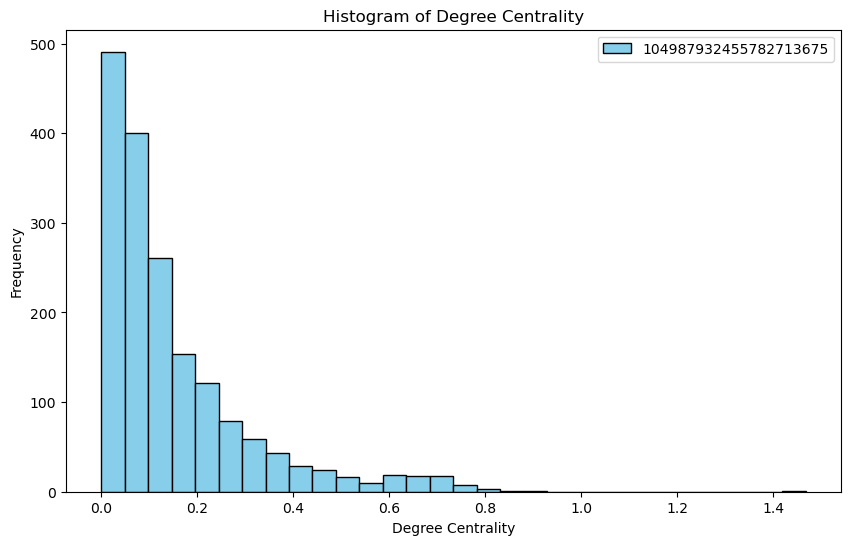

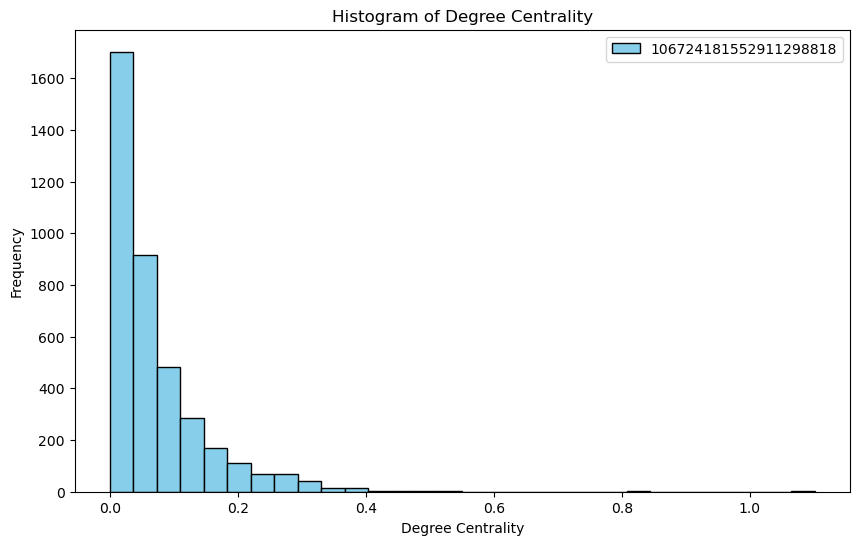

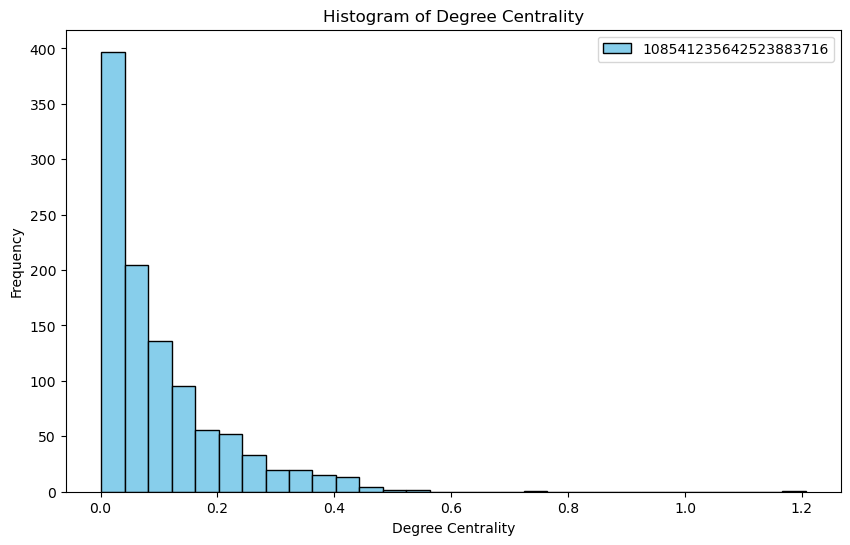

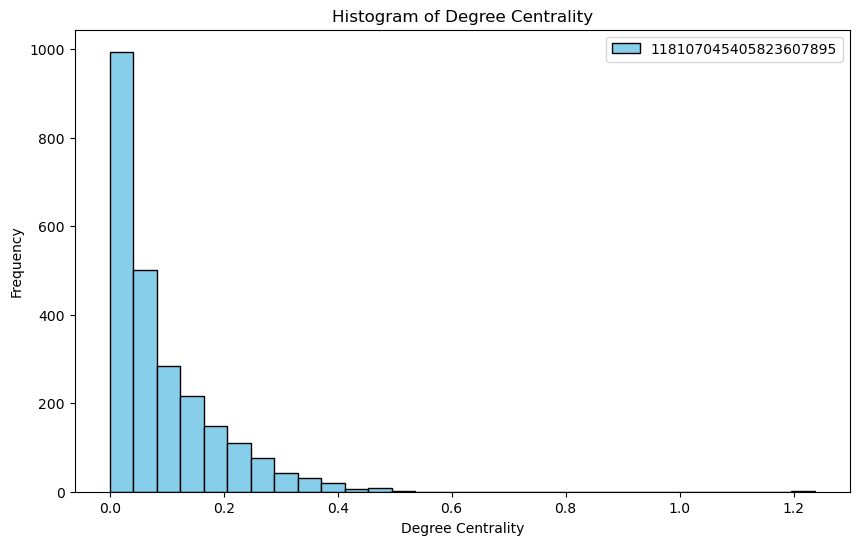

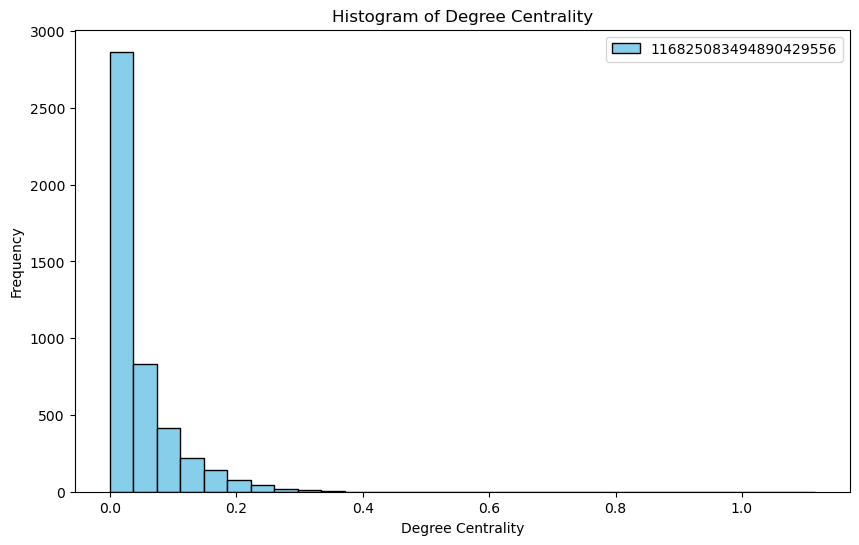

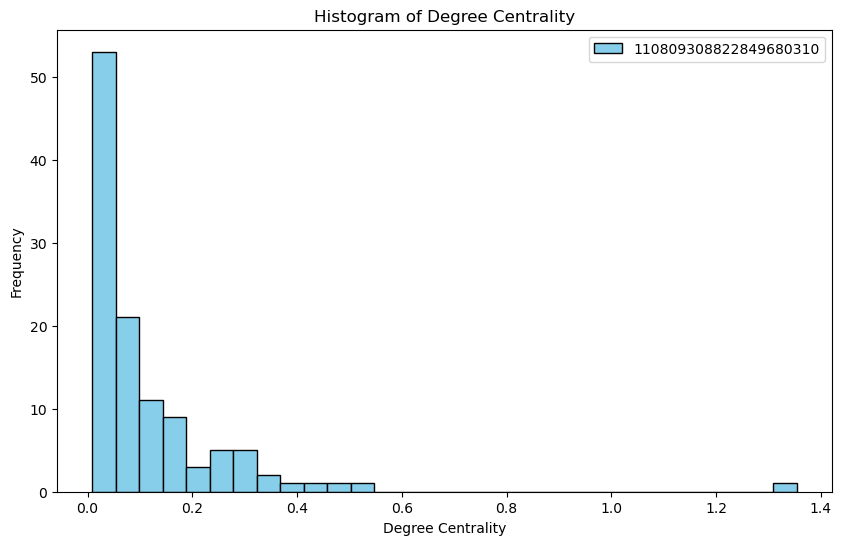

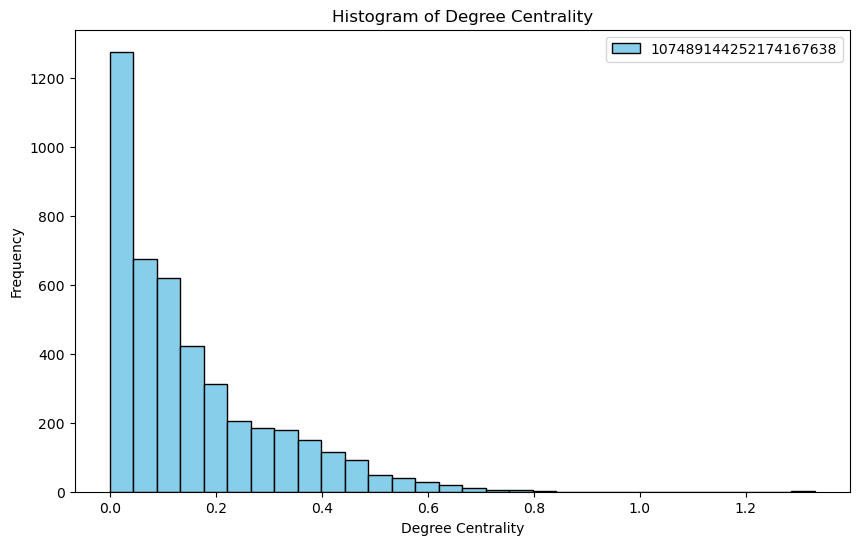

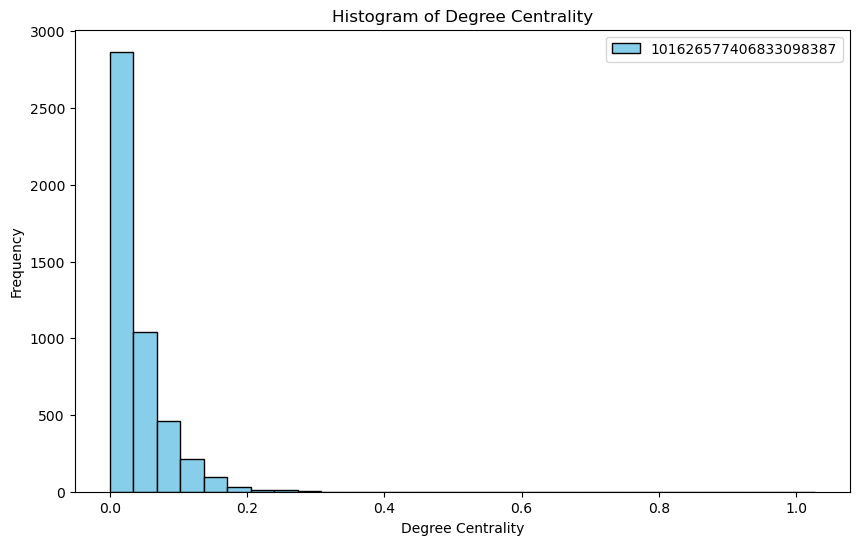

In [ ]:
def graphDegreeCentrality(ego_graph):
    degree_centrality = nx.degree_centrality(ego_graph)
    nx.set_node_attributes(ego_graph, degree_centrality, 'degree_centrality')

    #giving a list of the nodes ordered by their degree centrality
    sorted_degree_centrality = [node for node, _ in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)]
    
    print(f"Degree Centrality of EgoNode {ego_graph.name}: {ego_graph.nodes[ego_graph.name]['degree_centrality']}")
    graphStatistics('Degree Centrality',list(degree_centrality.values()))
    graphHistogram('Degree Centrality',list(degree_centrality.values()),ego_graph.name)
    return sorted_degree_centrality

sortedDegreeCentralities = [] 
for i in range(len(egoGraphs)):
    sortedDegreeCentralities.append(graphDegreeCentrality(egoGraphs[i][0]))
    print (f" EgoNet {egoGraphs[i][1]} Max Degree Centrality: {egoGraphs[i][0].nodes[sortedDegreeCentralities[i][0]]['degree_centrality']}\n")

##### Eigenvector Centrality

Eigenvector Centrality of EgoNode 104987932455782713675: 0.0932183658681922
Mean of Eigenvector Centrality: 0.01821482149925008
Median of Eigenvector Centrality: 0.01491042639294289

 EgoNet 104987932455782713675 Max Eigenvector: 0.0932183658681922

Eigenvector Centrality of EgoNode 106724181552911298818: 0.014270660811579973
Mean of Eigenvector Centrality: 0.010001559368227976
Median of Eigenvector Centrality: 0.004718825696258835

 EgoNet 106724181552911298818 Max Eigenvector: 0.10262175343993171

Eigenvector Centrality of EgoNode 108541235642523883716: 0.049800750839847176
Mean of Eigenvector Centrality: 0.018990905228269368
Median of Eigenvector Centrality: 0.009337540675773706

 EgoNet 108541235642523883716 Max Eigenvector: 0.14985676321624813

Eigenvector Centrality of EgoNode 118107045405823607895: 0.06333796196417348
Mean of Eigenvector Centrality: 0.013829140691163259
Median of Eigenvector Centrality: 0.008252793447306544

 EgoNet 118107045405823607895 Max Eigenvector: 0.09117

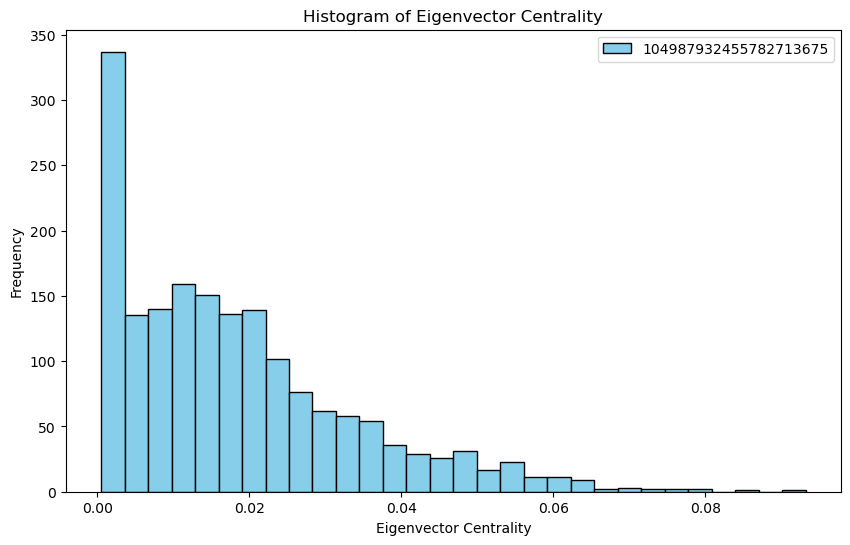

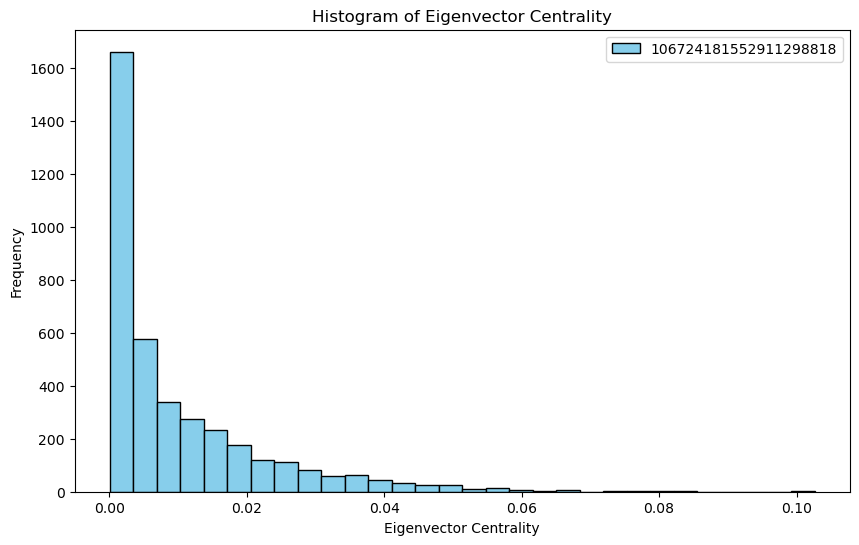

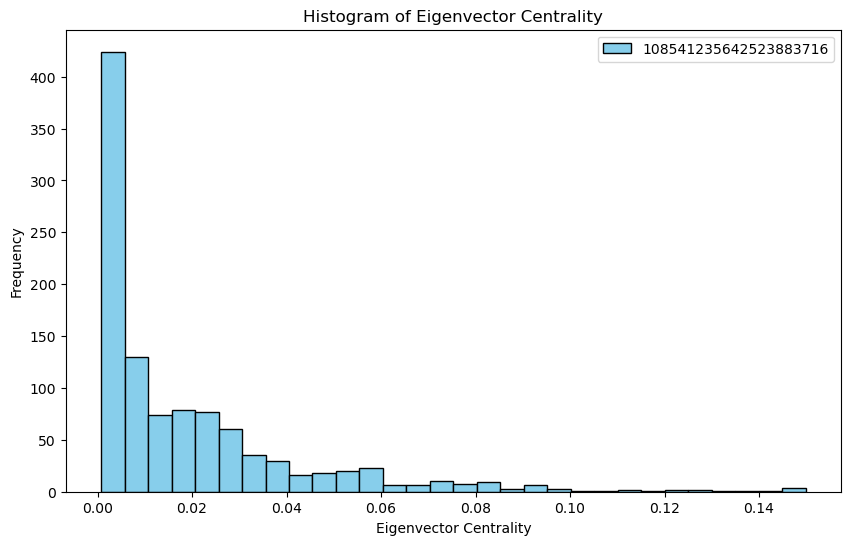

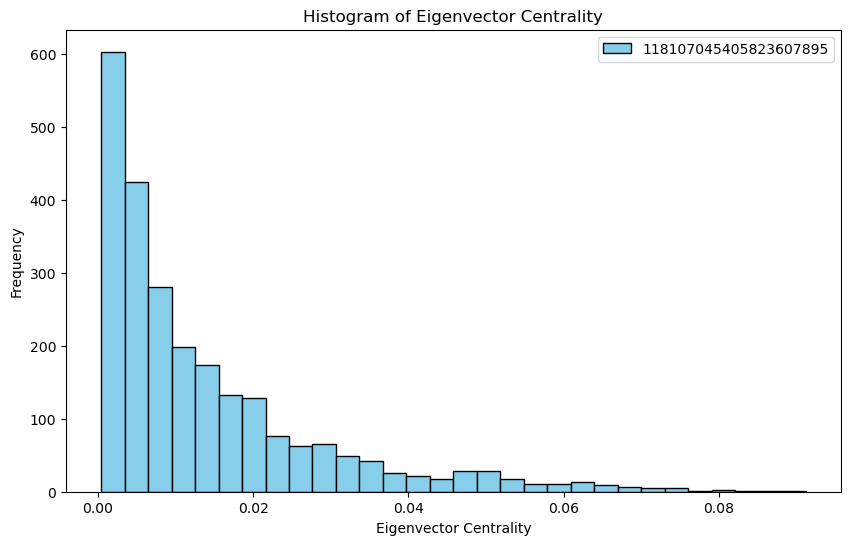

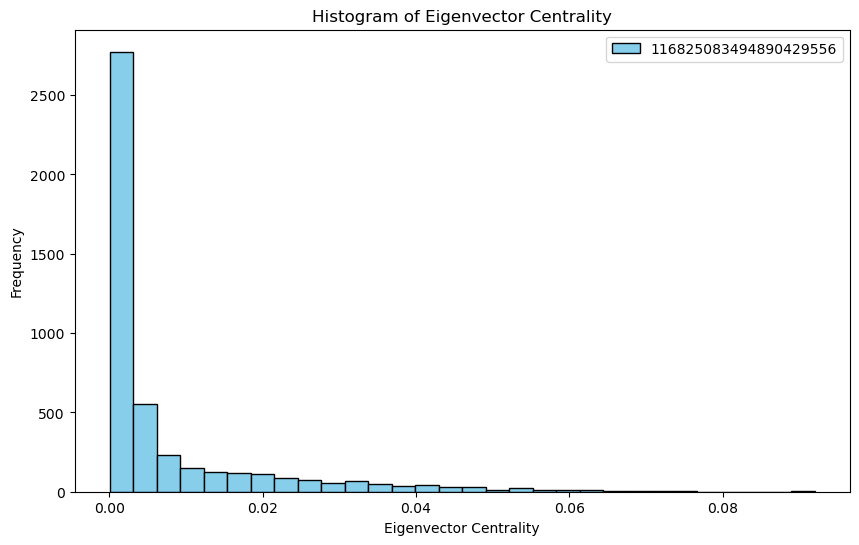

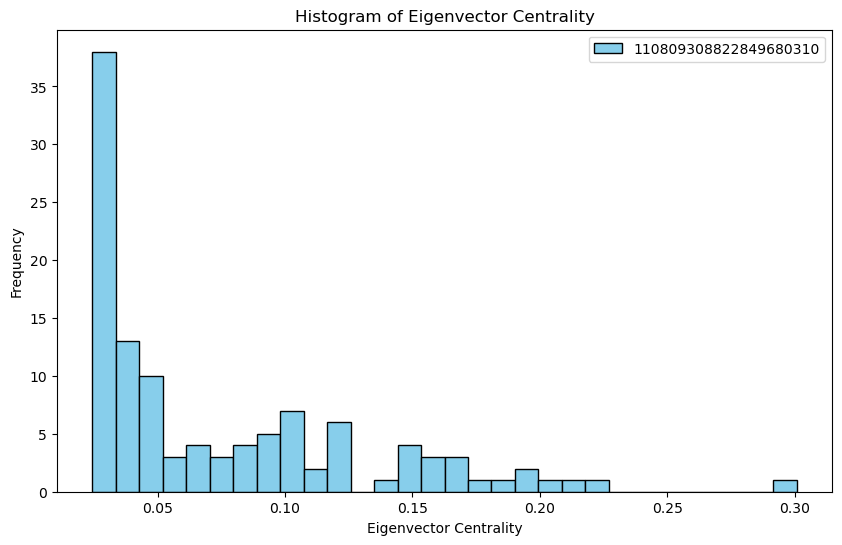

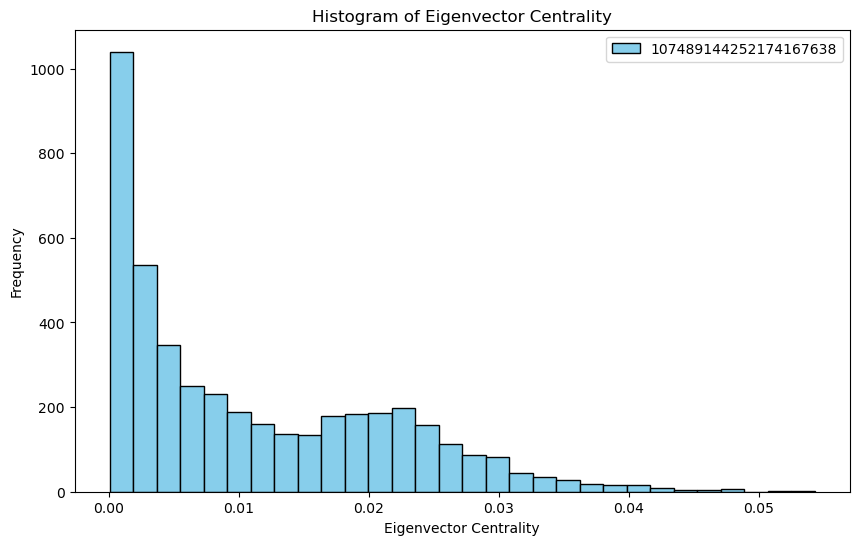

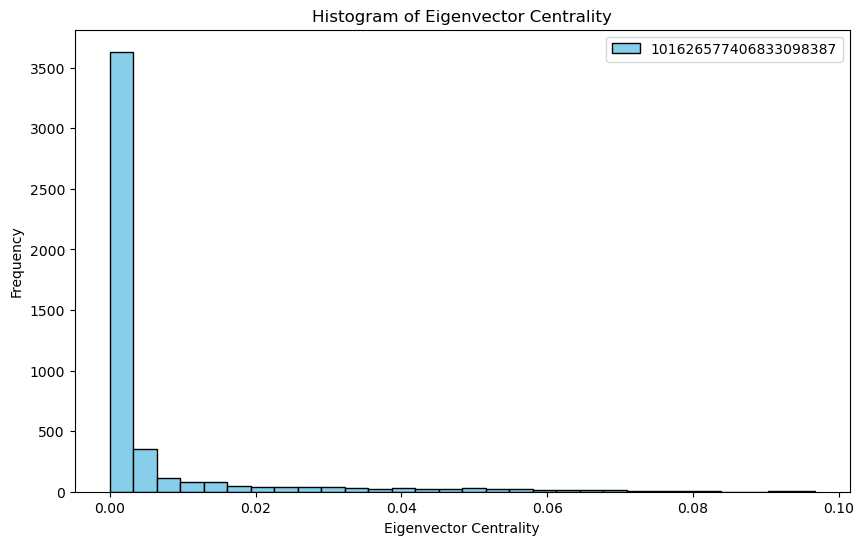

In [ ]:
def graphEigenCentrality(ego_graph):
    eigenvector_centrality = nx.eigenvector_centrality(ego_graph)
    nx.set_node_attributes(ego_graph, eigenvector_centrality, 'eigenvector_centrality')

    #giving a list of the nodes ordered by their eigenvector centrality
    sorted_eigenvector_centrality = [node for node, _ in sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)]

    print(f"Eigenvector Centrality of EgoNode {ego_graph.name}: {ego_graph.nodes[ego_graph.name]['eigenvector_centrality']}")
    graphStatistics('Eigenvector Centrality',list(eigenvector_centrality.values()))
    graphHistogram('Eigenvector Centrality',list(eigenvector_centrality.values()),ego_graph.name)
    return sorted_eigenvector_centrality

sortedEigenvectorCentralities = []
for i in range(len(egoGraphs)):
    sortedEigenvectorCentralities.append(graphEigenCentrality(egoGraphs[i][0]))
    print (f" EgoNet {egoGraphs[i][1]} Max Eigenvector: {egoGraphs[i][0].nodes[sortedEigenvectorCentralities[i][0]]['eigenvector_centrality']}\n")

##### Closeness Centrality

Closeness Centrality of EgoNode 104987932455782713675: 0.49783042227449037
Mean of Closeness Centrality: 0.3154549043818193
Median of Closeness Centrality: 0.3110626690813155

 EgoNet 104987932455782713675 Max Closeness Centrality: 0.49783042227449037

Closeness Centrality of EgoNode 106724181552911298818: 0.3387829489839953
Mean of Closeness Centrality: 0.29043377055834807
Median of Closeness Centrality: 0.2945975682579616

 EgoNet 106724181552911298818 Max Closeness Centrality: 0.46879286780914253

Closeness Centrality of EgoNode 108541235642523883716: 0.349876086081884
Mean of Closeness Centrality: 0.2733079542486225
Median of Closeness Centrality: 0.27044335550649845

 EgoNet 108541235642523883716 Max Closeness Centrality: 0.4284999256508466

Closeness Centrality of EgoNode 118107045405823607895: 0.38367590001443874
Mean of Closeness Centrality: 0.2938870092915525
Median of Closeness Centrality: 0.2915677380498567

 EgoNet 118107045405823607895 Max Closeness Centrality: 0.414572877

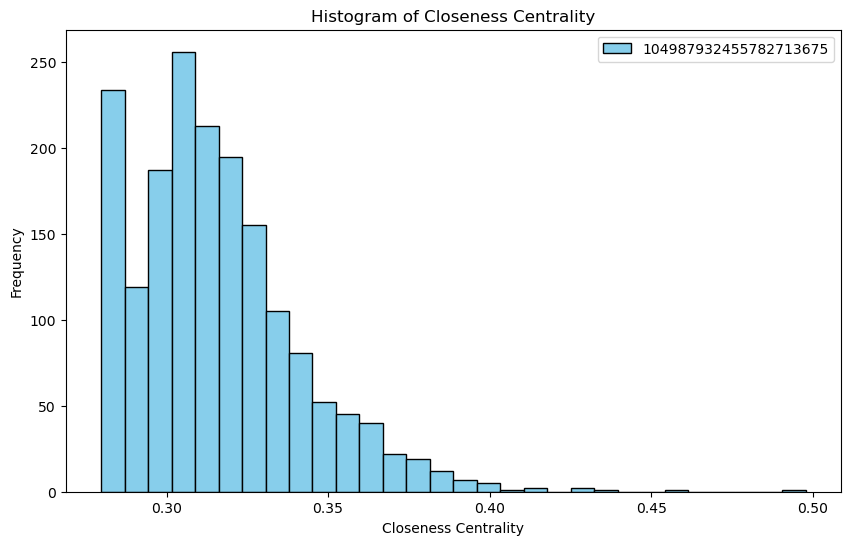

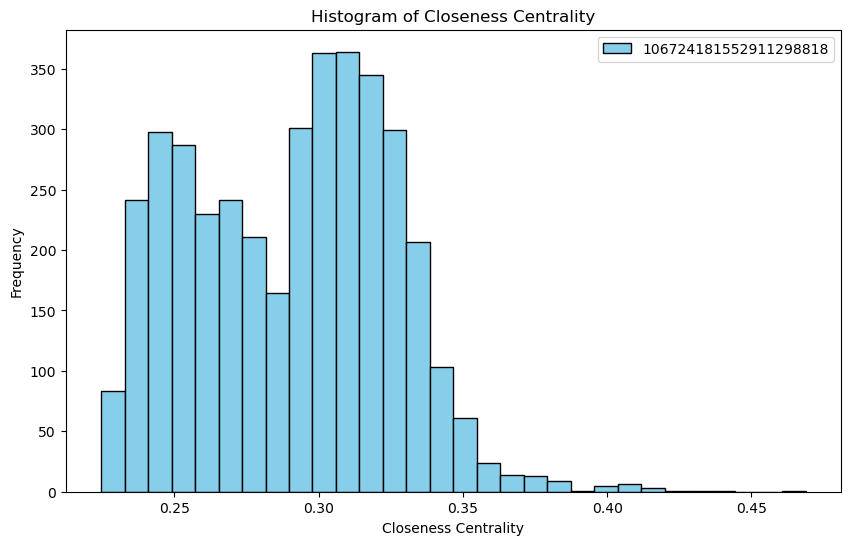

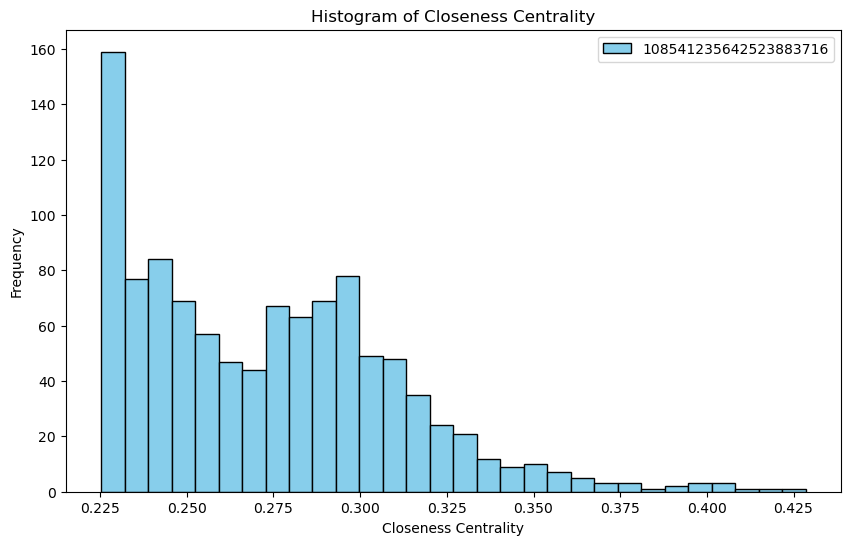

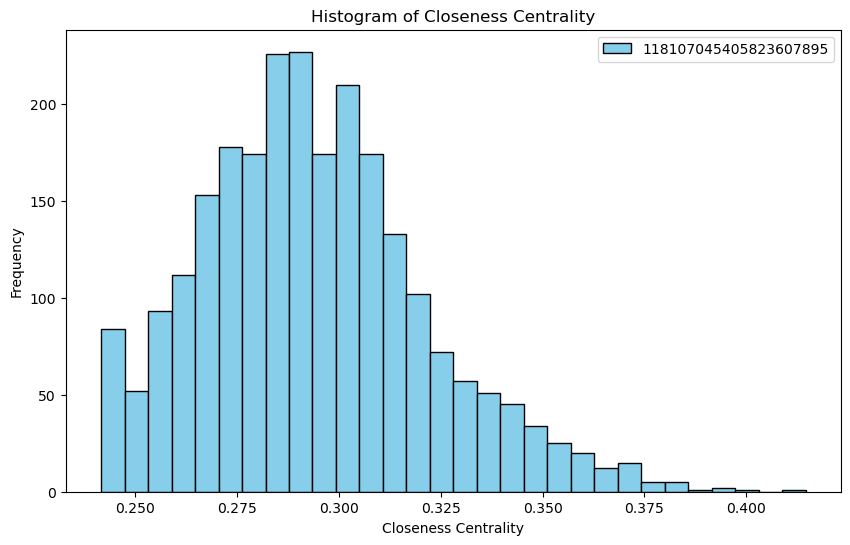

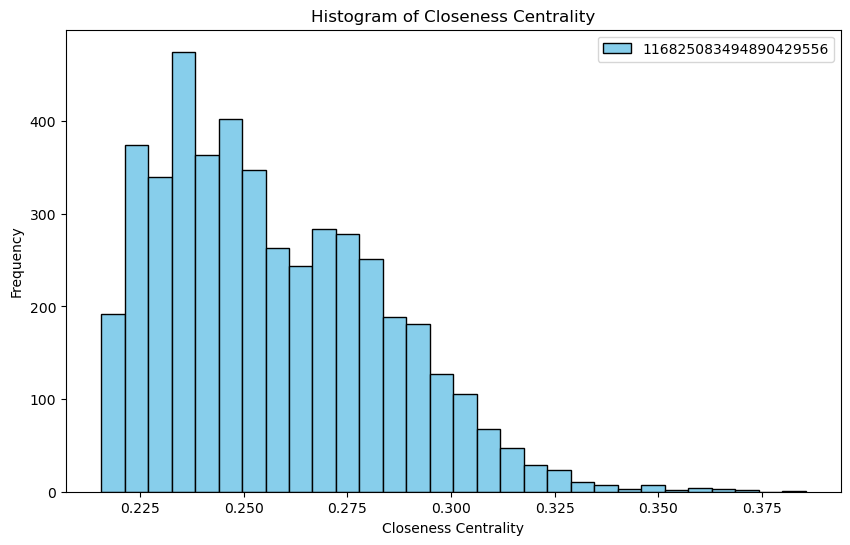

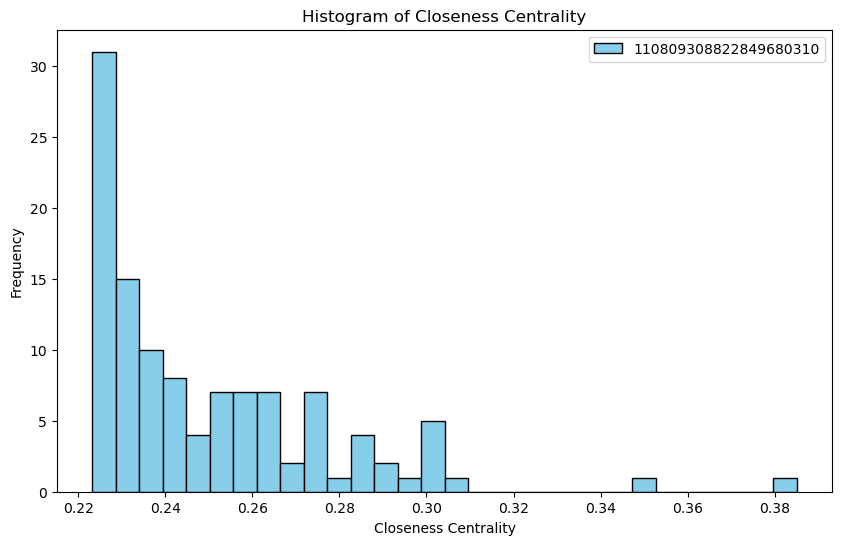

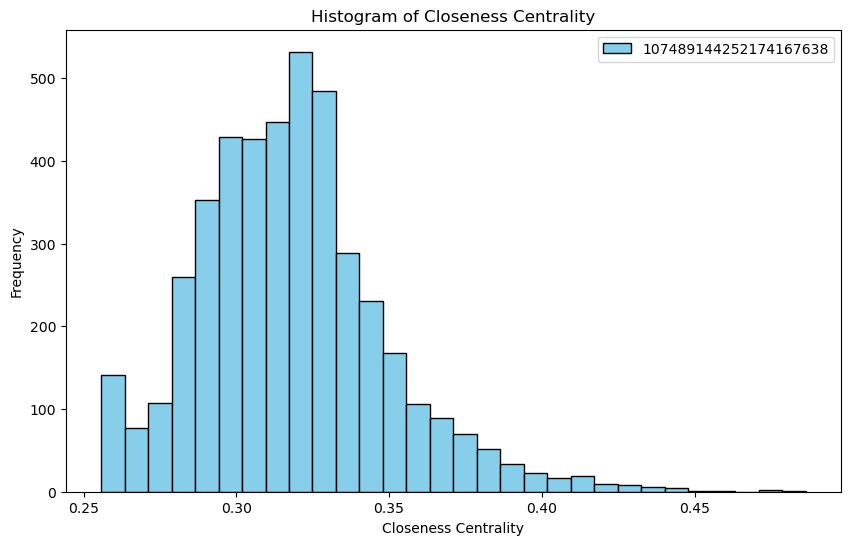

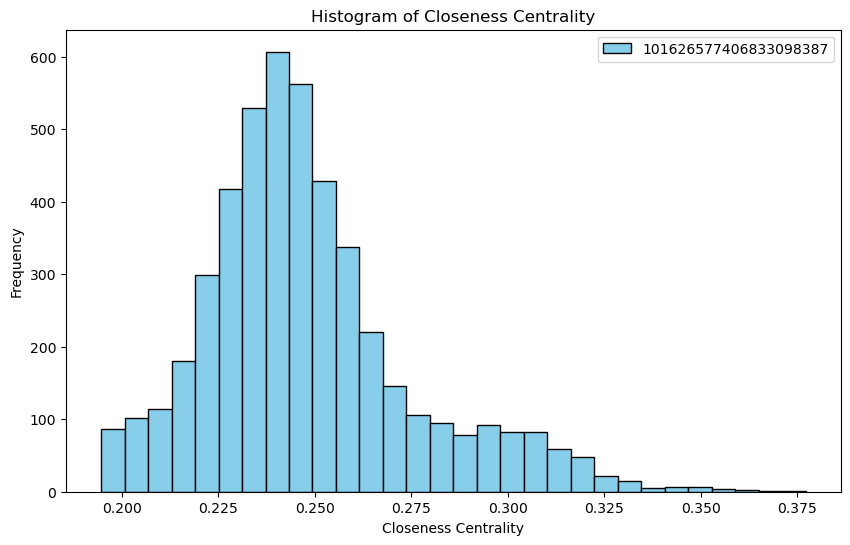

In [ ]:
def graphClosenessCentrality(ego_graph):
    closeness_centrality = nx.closeness_centrality(ego_graph)
    nx.set_node_attributes(ego_graph, closeness_centrality, 'closeness_centrality')

    #giving a list of the nodes ordered by their eigenvector centrality
    sorted_closeness_centrality = [node for node, _ in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)]
    
    print(f"Closeness Centrality of EgoNode {ego_graph.name}: {ego_graph.nodes[ego_graph.name]['closeness_centrality']}")
    graphStatistics('Closeness Centrality',list(closeness_centrality.values()))
    graphHistogram('Closeness Centrality',list(closeness_centrality.values()),ego_graph.name)
    return sorted_closeness_centrality


sortedClosenessCentralities = []
for i in range(len(egoGraphs)):
    sortedClosenessCentralities.append(graphClosenessCentrality(egoGraphs[i][0]))
    print (f" EgoNet {egoGraphs[i][1]} Max Closeness Centrality: {egoGraphs[i][0].nodes[sortedClosenessCentralities[i][0]]['closeness_centrality']}\n")

##### Betweenness Centrality

Betweenness Centrality of EgoNode 104987932455782713675: 0.15982784615747536
Mean of Betweenness Centrality: 0.00037698273678814627
Median of Betweenness Centrality: 7.962691295135382e-06

 EgoNet 104987932455782713675 Max Betweenness Centrality: 0.15982784615747536

Betweenness Centrality of EgoNode 106724181552911298818: 0.07483109052047404
Mean of Betweenness Centrality: 0.00022832937763831958
Median of Betweenness Centrality: 9.511310078493014e-06

 EgoNet 106724181552911298818 Max Betweenness Centrality: 0.07483109052047404

Betweenness Centrality of EgoNode 108541235642523883716: 0.1777725222420154
Mean of Betweenness Centrality: 0.0008151070697694771
Median of Betweenness Centrality: 1.3564735531094586e-05

 EgoNet 108541235642523883716 Max Betweenness Centrality: 0.1777725222420154

Betweenness Centrality of EgoNode 118107045405823607895: 0.1073949491565597
Mean of Betweenness Centrality: 0.00033095469437647456
Median of Betweenness Centrality: 8.627406264336287e-06

 EgoNet 11

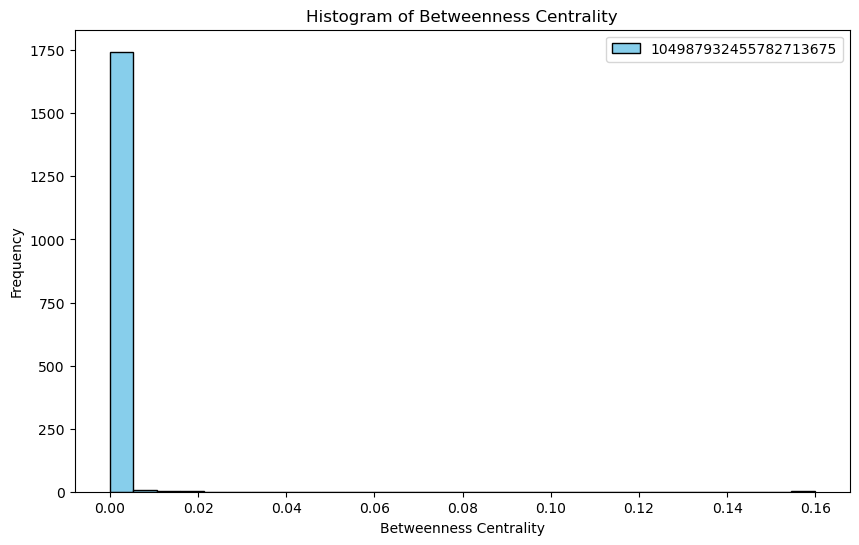

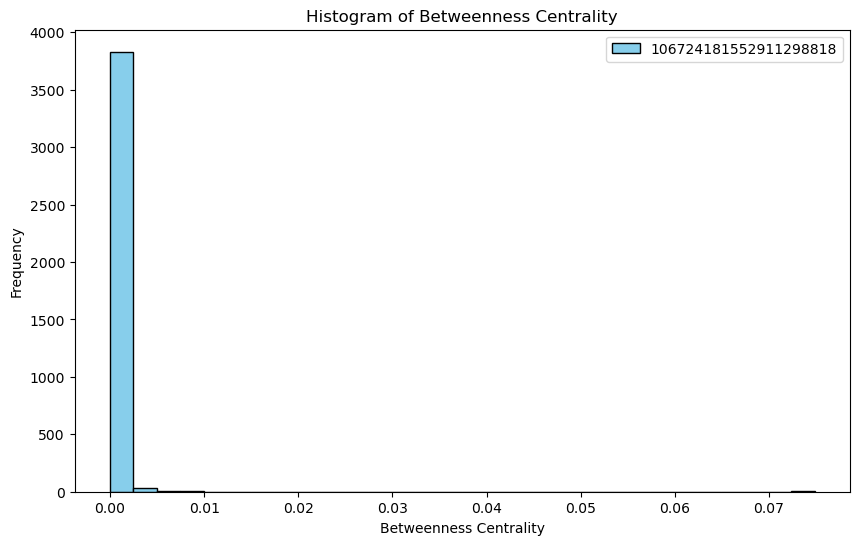

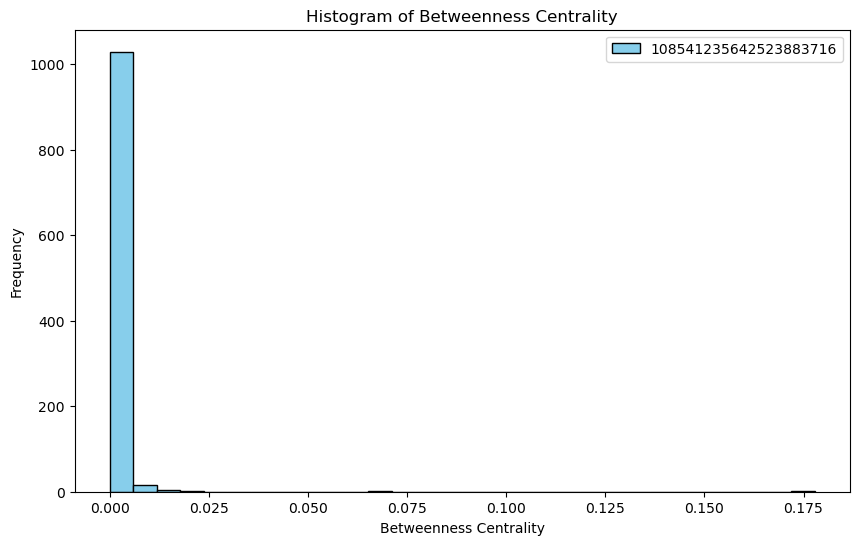

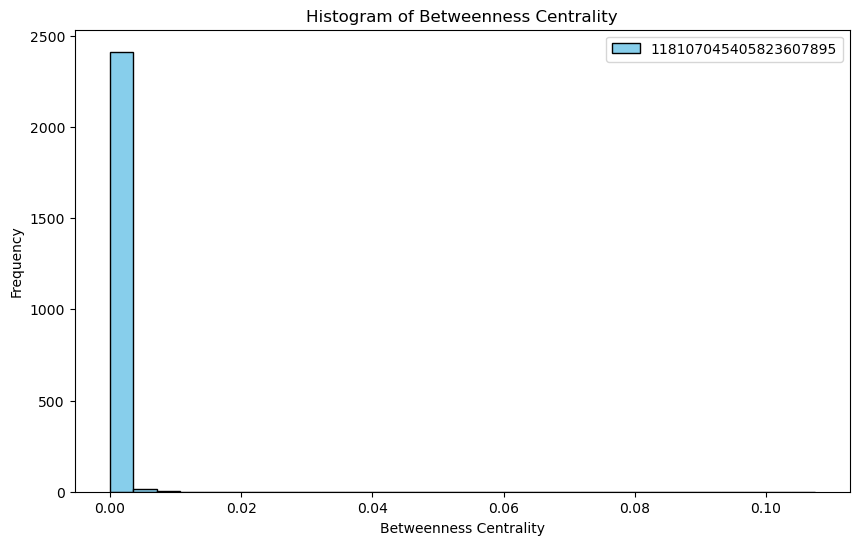

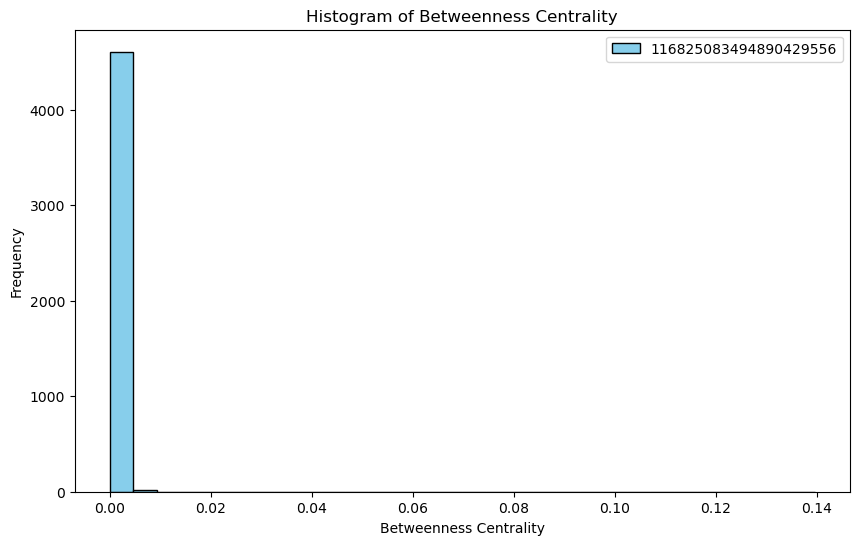

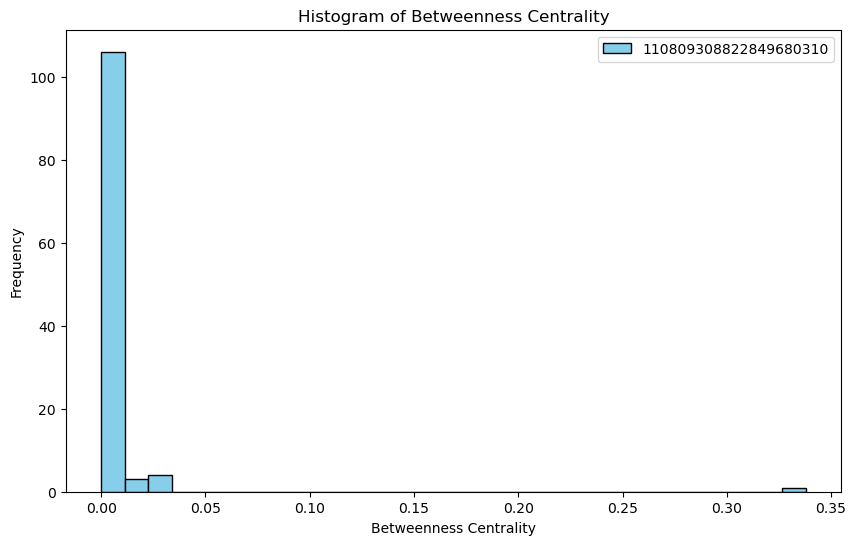

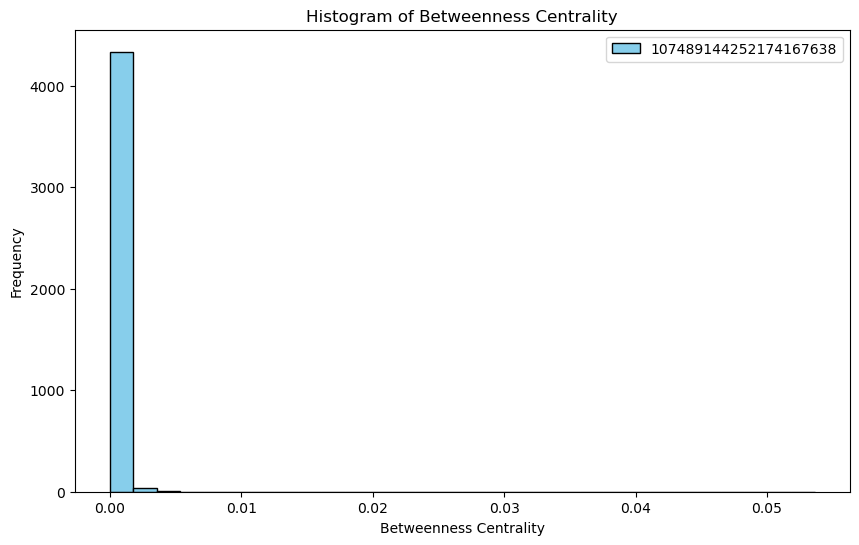

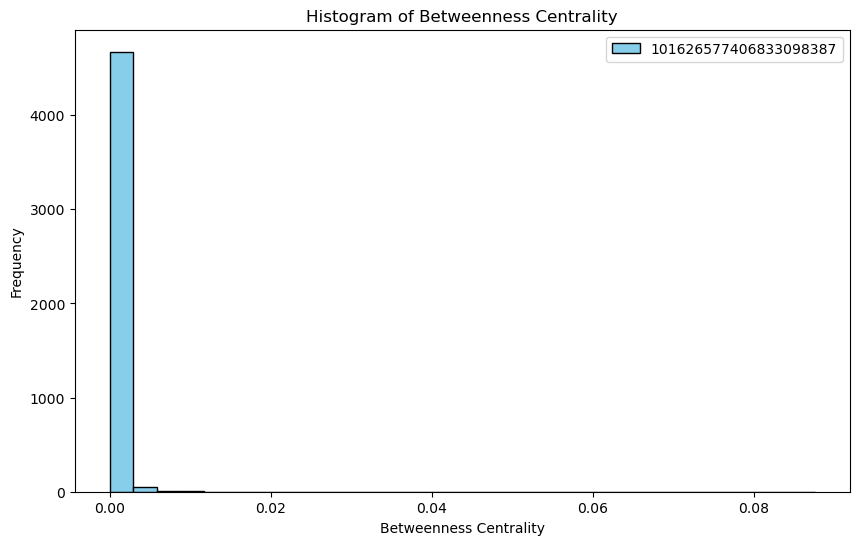

In [ ]:
def graphBetweennessCentrality(ego_graph):
    betweenness_centrality = nx.betweenness_centrality(ego_graph)
    nx.set_node_attributes(ego_graph, betweenness_centrality, 'betweenness_centrality')

    sorted_betweenness_centrality = [node for node, _ in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)]
    
    print(f"Betweenness Centrality of EgoNode {ego_graph.name}: {ego_graph.nodes[ego_graph.name]['betweenness_centrality']}")
    graphStatistics('Betweenness Centrality', list(betweenness_centrality.values()))
    graphHistogram('Betweenness Centrality', list(betweenness_centrality.values()), ego_graph.name)
    return sorted_betweenness_centrality
    
sortedBetweennessCentralities = []
for i in range(len(egoGraphs)):
    sortedBetweennessCentralities.append(graphBetweennessCentrality(egoGraphs[i][0]))
    print(f" EgoNet {egoGraphs[i][1]} Max Betweenness Centrality: {egoGraphs[i][0].nodes[sortedBetweennessCentralities[i][0]]['betweenness_centrality']}\n")

##### Edge Betweenness Centrality

Mean of Edge Betweenness Centrality: 5.621222751615037e-06
Median of Edge Betweenness Centrality: 1.8538993116500964e-06

 EgoNet 104987932455782713675 Max Edge Betweenness Centrality: ('104364058018116761460', '104987932455782713675')

Mean of Edge Betweenness Centrality: 2.946021241062573e-06
Median of Edge Betweenness Centrality: 8.057602867033819e-07

 EgoNet 106724181552911298818 Max Edge Betweenness Centrality: ('111091089527727420853', '106724181552911298818')

Mean of Edge Betweenness Centrality: 2.66218817510423e-05
Median of Edge Betweenness Centrality: 6.0450208785765e-06

 EgoNet 108541235642523883716 Max Edge Betweenness Centrality: ('111091089527727420853', '108541235642523883716')

Mean of Edge Betweenness Centrality: 5.418993425743088e-06
Median of Edge Betweenness Centrality: 1.9535484537900623e-06

 EgoNet 118107045405823607895 Max Edge Betweenness Centrality: ('111091089527727420853', '118107045405823607895')

Mean of Edge Betweenness Centrality: 3.3039084266522934e-

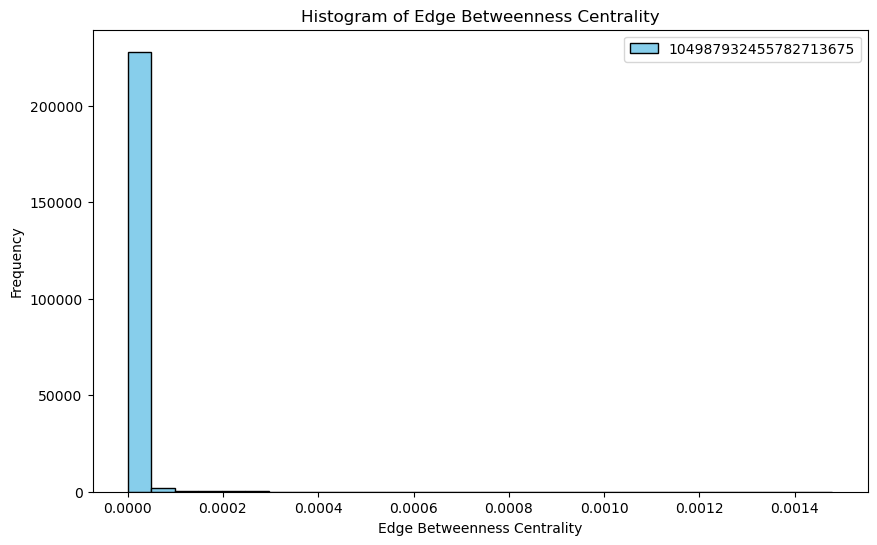

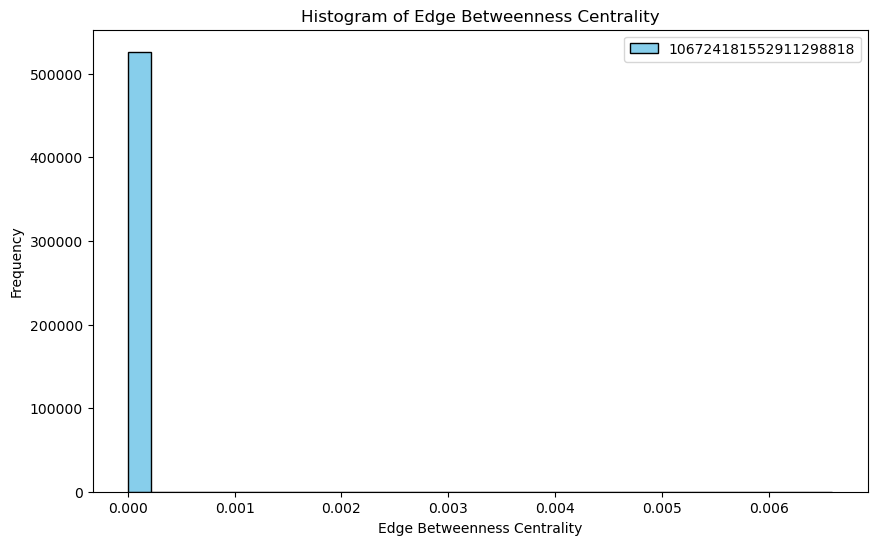

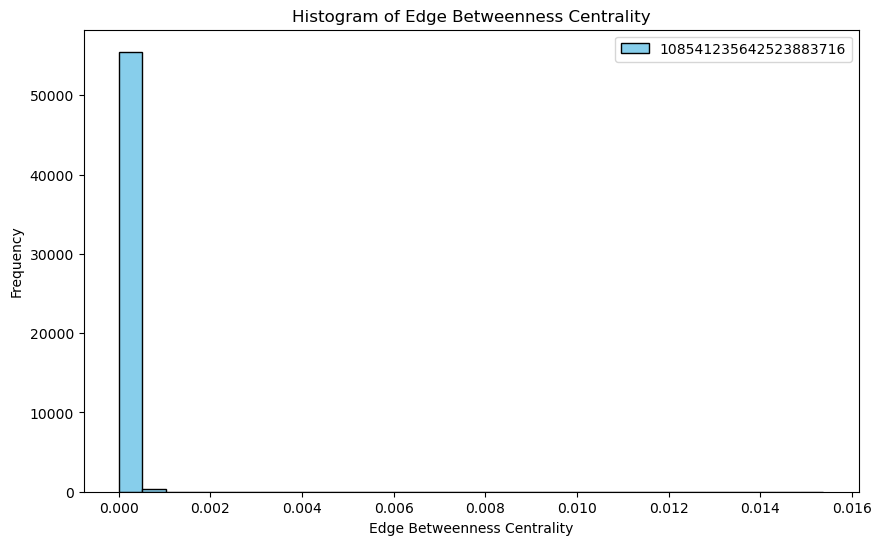

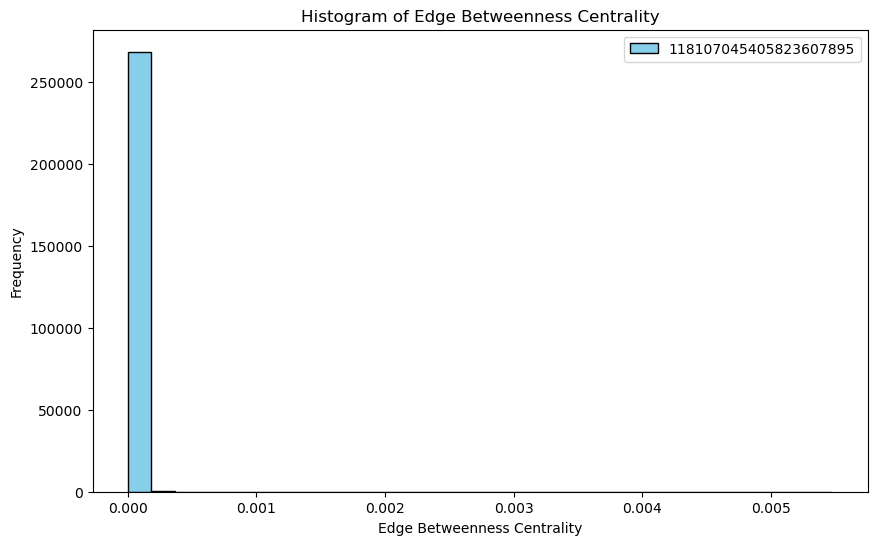

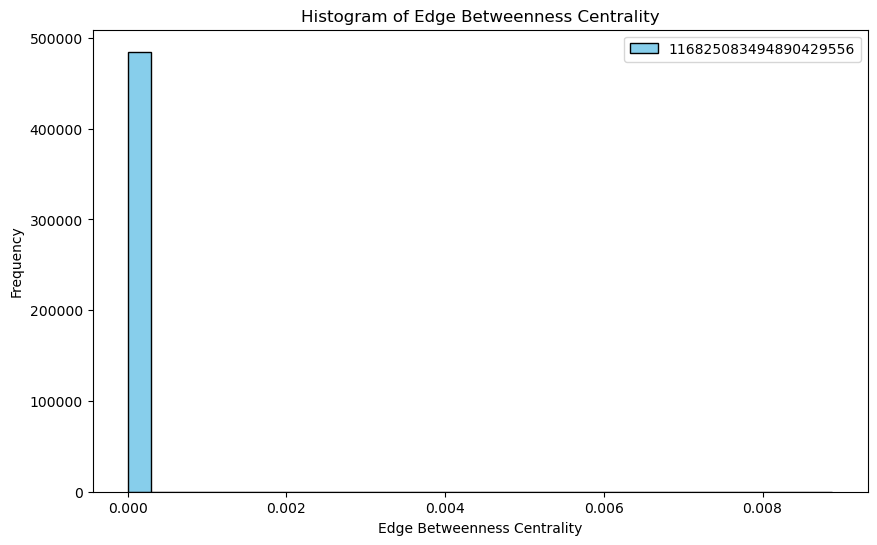

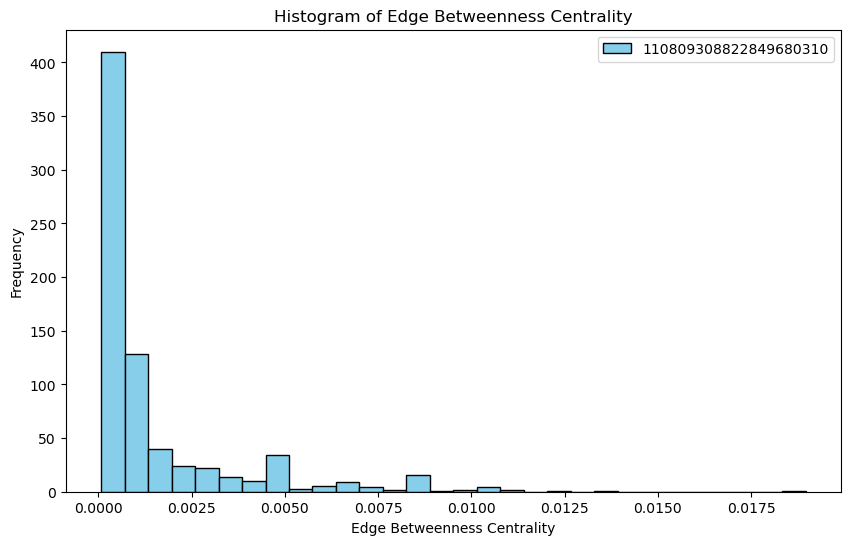

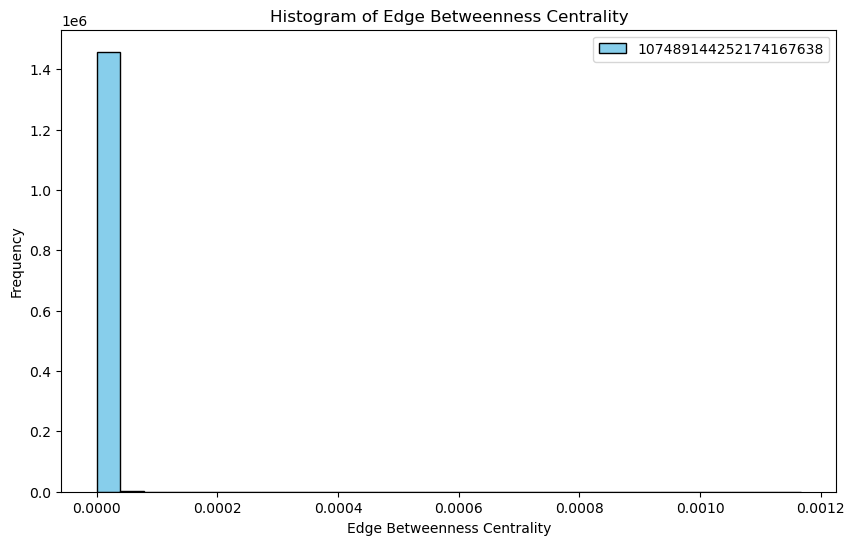

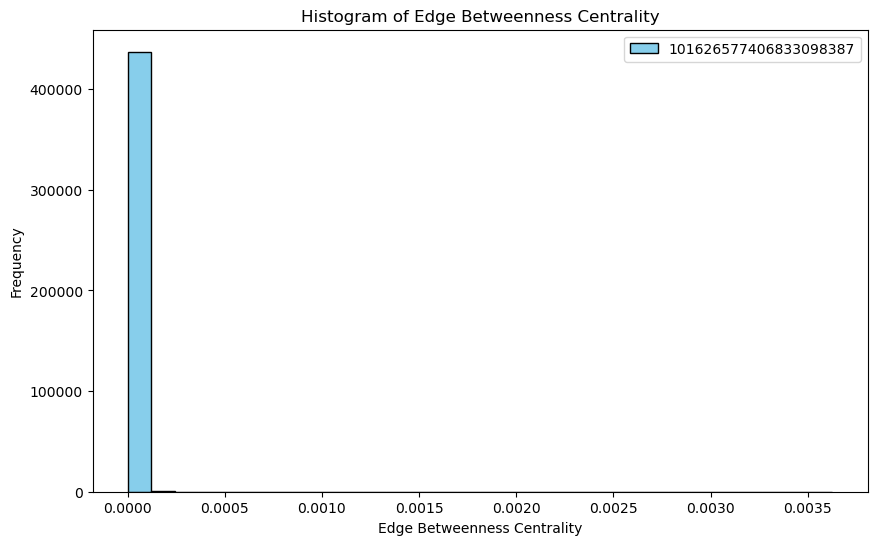

In [ ]:
def edgeBetweennessCentrality(ego_graph):
    edge_betweenness_centrality = nx.edge_betweenness_centrality(ego_graph)
    sorted_edge_betweenness_centrality = [edge for edge, _ in sorted(edge_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)]
    #print(f"Edge Betweenness Centrality: {edge_betweenness_centrality}")
    graphStatistics('Edge Betweenness Centrality',list(edge_betweenness_centrality.values()))
    graphHistogram('Edge Betweenness Centrality',list(edge_betweenness_centrality.values()),ego_graph.name)
    return sorted_edge_betweenness_centrality

sortedEdgeBetweennessCentralities = []
for i in range(len(egoGraphs)):
    sortedEdgeBetweennessCentralities.append(edgeBetweennessCentrality(egoGraphs[i][0]))
    print(f" EgoNet {egoGraphs[i][1]} Max Edge Betweenness Centrality: {sortedEdgeBetweennessCentralities[i][0]}\n")

##### Saving Centralities in CSV

In [ ]:
def saveCentralities(ego_graph, egoNet):
    folder_path = f'./output/{egoNet}'
    os.makedirs(folder_path, exist_ok=True)
    
    # Save centralities information
    with open(f'{folder_path}/centralities.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Node ID', 'Degree Centrality', 'Eigenvector Centrality', 'Closeness Centrality', 'Betweenness Centrality'])
        for node in ego_graph.nodes:
            writer.writerow([
                node, 
                ego_graph.nodes[node].get('degree_centrality', 'N/A'),
                ego_graph.nodes[node].get('eigenvector_centrality', 'N/A'),
                ego_graph.nodes[node].get('closeness_centrality', 'N/A'),
                ego_graph.nodes[node].get('betweenness_centrality', 'N/A')
            ])

for i in range(len(egoGraphs)):
    saveCentralities(egoGraphs[i][0], egoGraphs[i][1])

#### Popularity of Alters 

In [ ]:
def top5Nodes(ego_graph, egoNet, sortedCentrality, centrality_name):
    print(f"Top 5 Nodes with Highest {centrality_name} in EgoNet {egoNet}")
    top5 = sortedCentrality[:5]
    df = pd.DataFrame({
        'Node': [node for node in top5],
        centrality_name: [ego_graph.nodes[node].get(centrality_name, 'N/A') for node in top5],
        'Number of Degrees': [ego_graph.degree[node] for node in top5],
        'Feature': [ego_graph.nodes[node].get('features', 'N/A') for node in top5]
    })
    
    print(df)
    
    folder_path = f'./output/{egoNet}'
    os.makedirs(folder_path, exist_ok=True)
    df.to_csv(f'{folder_path}/top5_{centrality_name}.csv', index=False)

for i in range(len(egoGraphs)):
    top5Nodes(egoGraphs[i][0], egoGraphs[i][1], sortedDegreeCentralities[i], 'degree_centrality')
    top5Nodes(egoGraphs[i][0], egoGraphs[i][1], sortedEigenvectorCentralities[i], 'eigenvector_centrality')
    top5Nodes(egoGraphs[i][0], egoGraphs[i][1], sortedClosenessCentralities[i], 'closeness_centrality')
    top5Nodes(egoGraphs[i][0], egoGraphs[i][1], sortedBetweennessCentralities[i], 'betweenness_centrality')

Top 5 Nodes with Highest degree_centrality in EgoNet 104987932455782713675
                    Node  degree_centrality  \
0  104987932455782713675           1.467503   
1  109330684746468207713           0.906499   
2  108470782772821648496           0.850057   
3  113184091727451211493           0.823261   
4  102476152658204495450           0.819840   

                                             Feature  
0  [gender:1, institution:, job_title:at, job_tit...  
1  [gender:1, job_title:&, job_title:art, job_tit...  
2  [gender:2, job_title:architect,, job_title:aut...  
3  [gender:1, job_title:documentary, job_title:ph...  
4  [gender:2, job_title:blogger, job_title:photog...  
Top 5 Nodes with Highest eigenvector_centrality in EgoNet 104987932455782713675
                    Node  eigenvector_centrality  \
0  104987932455782713675                0.093218   
1  105237212888595777019                0.084200   
2  118418436905562612953                0.078975   
3  102476152658204495450

In [ ]:
def getClosestNodes(ego_graph, egoNet):

    # Calculate shortest path lengths from the ego node to all other nodes
    path_lengths = nx.shortest_path_length(ego_graph, egoNet)
    
    # Sort nodes by path length and get the closest ones
    closest_nodes = sorted(path_lengths, key=path_lengths.get)

    top5 = closest_nodes[:5]
    last5 = closest_nodes[-5:]
    print(f"Closest Nodes:")
    for node in top5:   
        print(f"Node {node}: {ego_graph.nodes[node]['features']}")
    print(f"Farthest Nodes:")
    for node in last5:
        print(f"Node {node}: {ego_graph.nodes[node]['features']}")

    dft = pd.DataFrame({
        'Node': [node for node in top5],
        'Feature': [ego_graph.nodes[node].get('features', 'N/A') for node in top5]
    })

    dfl = pd.DataFrame({
        'Node': [node for node in last5],
        'Feature': [ego_graph.nodes[node].get('features', 'N/A') for node in last5]
    })
    
    folder_path = f'./output/{egoNet}'
    os.makedirs(folder_path, exist_ok=True)
    dft.to_csv(f'{folder_path}/closerNodes.csv', index=False)
    dfl.to_csv(f'{folder_path}/farthestNodes.csv', index=False)

# Example usage
for ego_graph, egoNet in egoGraphs:
    getClosestNodes(ego_graph, egoNet)
    

Closest Nodes:
Node 104987932455782713675: ['gender:1', 'institution:', 'job_title:at', 'job_title:blogger', 'job_title:photographer,', 'last_name:thomas', 'place:Los']
Node 112063946124358686266: ['gender:1', 'job_title::)', 'job_title:being', 'job_title:retired', 'last_name:tom', 'university:University']
Node 105706178492556563330: ['gender:1', 'job_title:photographer', 'last_name:billy']
Node 117378076401635777570: ['gender:1', "job_title:don't", 'job_title:i', 'job_title:know', 'job_title:senior', 'job_title:strategist', 'job_title:that', 'job_title:what', 'last_name:andy', 'university:Northwestern', 'university:University']
Node 104364058018116761460: ['gender:1', 'institution:Apple', 'job_title:and', 'job_title:at', 'job_title:cto', 'job_title:of', 'job_title:product', 'last_name:tom', 'place:Ann', 'place:Chicago,', 'place:San', 'university:University']
Farthest Nodes:
Node 102244999235542855716: []
Node 107877829722242329922: []
Node 102128561574743081027: []
Node 10078460053048

#### Louvain Algorithm

In [ ]:
from networkx.algorithms.community import louvain_communities
def getLouvainCommunities(ego_graph, egoNet):
    communities = list(louvain_communities(ego_graph))
    best_community = max(communities, key=len)

    print(f"Louvain Communities of EgoNet {egoNet}")
    for i, community in enumerate(communities):
        print(f"Community {i+1}: {community}")
    print(f"Best Community: {best_community}\n")

    folder_path = f'./output/{egoNet}'
    os.makedirs(folder_path, exist_ok=True)

    # Save communities information
    with open(f'{folder_path}/communities.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Community', 'Node ID', 'Features'])
        for i, community in enumerate(communities):
            for node in community:
                features = ego_graph.nodes[node]['features']
                writer.writerow([f'Community {i+1}', node, features])
    
    #Save best Community
    with open(f'{folder_path}/best_community.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Node ID', 'Features'])
        for node in best_community:
            features = ego_graph.nodes[node]['features']
            writer.writerow([node, features])
    return communities, best_community

communities = []
for i in range(len(egoGraphs)):
    communities.append(getLouvainCommunities(egoGraphs[i][0], egoGraphs[i][1]))

Louvain Communities of EgoNet 104987932455782713675
Community 1: {'108531255239680225213', '108526365131194237973', '110736766605143487896', '103251327896115493952', '102301925235690691403', '113289267877003023795', '114807257227149972393', '114725410996879442582', '116184062049364511550', '118170768987466114474', '109828573684213237175', '107735676082414469548', '111396408762595559038', '116160296886796853429', '113327517821930496785', '106420269962430318959', '103524029725020180286', '104606614753457778918', '118339706248486457324', '117184181258526632678', '113146596813770102711', '114927294217645926989', '106551901875603098689', '101510589209151784871', '112405160668581498038', '111176172612065342210', '110574822689595754039', '104716550210056191134', '116272870812037282078', '103000734287338406086', '100080670028138179312', '111698111324336656255', '109698561708069608034', '108110890780038071258', '115739714059328962238', '111914287835055721452', '109330684746468207713', '10035474

Variables until now :
- ***G*** (Graph) : Graph of the full Dataset
- ***egoGraphs*** (Ego Graph List) : List of Ego Graphs selected
- ***circles*** (List) : List of tuples composed by Dictionary of all the circles of the egoNets and a string with the circles name;
- ***followers*** (list) : List of all the followers of the EgoNets;
- ***components*** (list) : List of tuples with strongly and weakly connected components of the EgoNets;
- ***sortedDegreeCentralities*** (list) : List sorted (Ascended) Degree Centrality of all EgoNets;
- ***eigenveactorCentralities*** (list) : List sorted (Ascended) Eigenvector Centrality of all EgoNets;
- ***closenessCentralities*** (list) : List sorted (Ascended) Closeness Centrality of all EgoNets;
- ***betweennessCentralities*** (list) : List sorted (Ascended) Betweenness Centrality of all EgoNets;
- ***edgeBetweennessCentralities*** (list) : List sorted (Ascended) Edge Betweenness Centrality of all EgoNets;
- ***duplicate*** (list) : List of duplicated nodes of EgoNet;